In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 15m",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
pd.options.display.float_format = "{:.3f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count   mean  std bias  std unbias    min  \
iter stat                                                                 
i1   cpu usage             3948.000  4.464     5.845       5.846  0.007   
     memory usage          3948.000  0.774     0.852       0.852  0.031   
     request latency        900.000  0.244     0.309       0.310  0.002   
     request throughput     900.000 28.902    11.916      11.923 20.390   
     response time      1407141.000  3.950     6.705       6.705  0.000   
i2   cpu usage             2930.000  4.093     4.893       4.894  0.007   
     memory usage          2930.000  0.711     0.740       0.740  0.031   
     request latency        900.000  0.049     0.269       0.269  0.002   
     request throughput     900.000 36.195     9.534       9.539  5.474   
     response time       774624.000  1.253     5.298       5.298  0.000   
i3   cpu usage             3960.000  4.322     5.614       5.614  0.007   
     memory usage          3960.000  0.773     0.849       0.850  0.031   
     request latency        900.000  0.247     0.310       0.310  0.002   
     request throughput     900.000 28.820    11.944      11.950 20.416   
     response time      1409514.000  4.007     6.727       6.727  0.000   

                           25%    50%    75%     max  ci 95% -  ci 95% +  \
iter stat                                                                  
i1   cpu usage           0.577  1.324  6.433  28.484     4.282     4.646   
     memory usage        0.182  0.408  1.098   5.114     0.748     0.801   
     request latency     0.005  0.202  0.333   1.498     0.224     0.264   
     request throughput 21.411 21.935 33.000  85.840    28.123    29.680   
     response time       0.000  0.000 15.099 311.300     3.938     3.961   
i2   cpu usage           0.553  1.324  7.084  21.208     3.915     4.270   
     memory usage        0.156  0.364  1.108   3.848     0.684     0.737   
     request latency     0.005  0.026  0.027   7.681     0.032     0.067   
     request throughput 30.686 33.888 38.840  85.845    35.572    36.819   
     response time       0.000  0.000  0.004 314.882     1.241     1.265   
i3   cpu usage           0.533  1.344  6.333  26.035     4.147     4.496   
     memory usage        0.180  0.411  1.144   5.137     0.746     0.799   
     request latency     0.005  0.204  0.341   1.425     0.226     0.267   
     request throughput 21.272 21.805 32.987  85.877    28.039    29.601   
     response time       0.000  0.000 15.100 311.300     3.996     4.018   

                         ci 99% -  ci 99% +  
iter stat                                    
i1   cpu usage              4.224     4.704  
     memory usage           0.739     0.809  
     request latency        0.217     0.270  
     request throughput    27.878    29.925  
     response time          3.935     3.964  
i2   cpu usage              3.860     4.326  
     memory usage           0.675     0.746  
     request latency        0.026     0.073  
     request throughput    35.376    37.014  
     response time          1.237     1.268  
i3   cpu usage              4.092     4.551  
     memory usage           0.738     0.807  
     request latency        0.220     0.273  
     request throughput    27.794    29.846  
     response time          3.992     4.021

In [4]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,4.293,0.153,0.187
response time,3.070,1.285,1.574
memory usage,0.753,0.030,0.036
request throughput,31.306,3.458,4.235
request latency,0.180,0.092,0.113


In [5]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

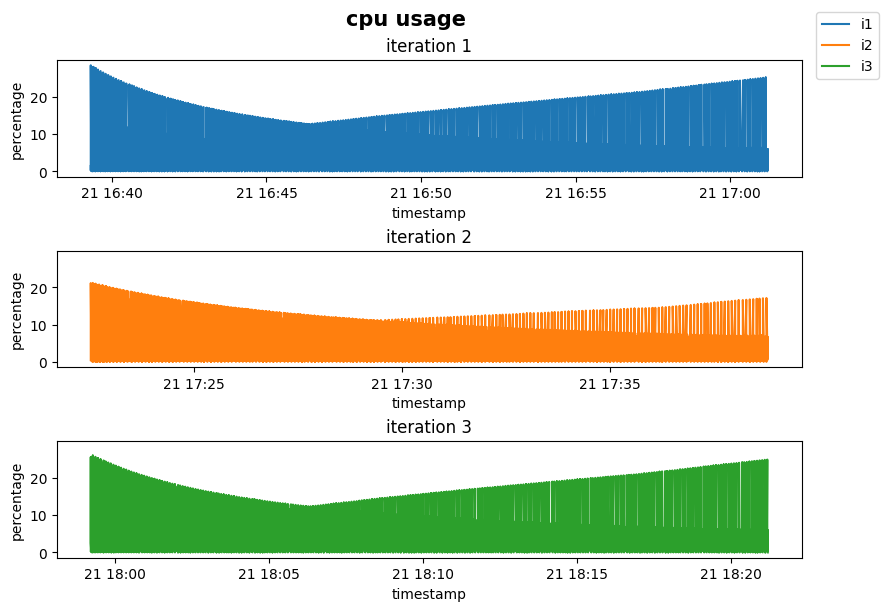

In [6]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

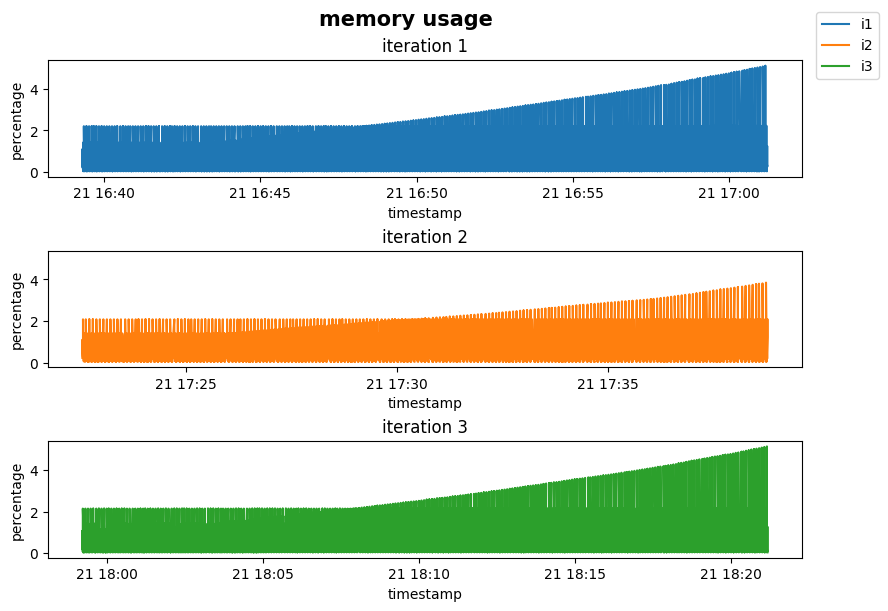

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

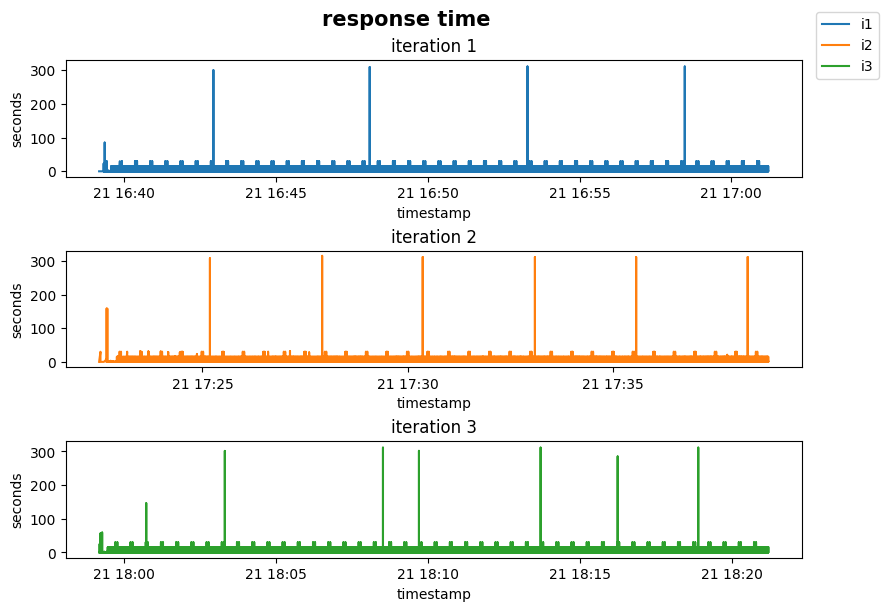

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

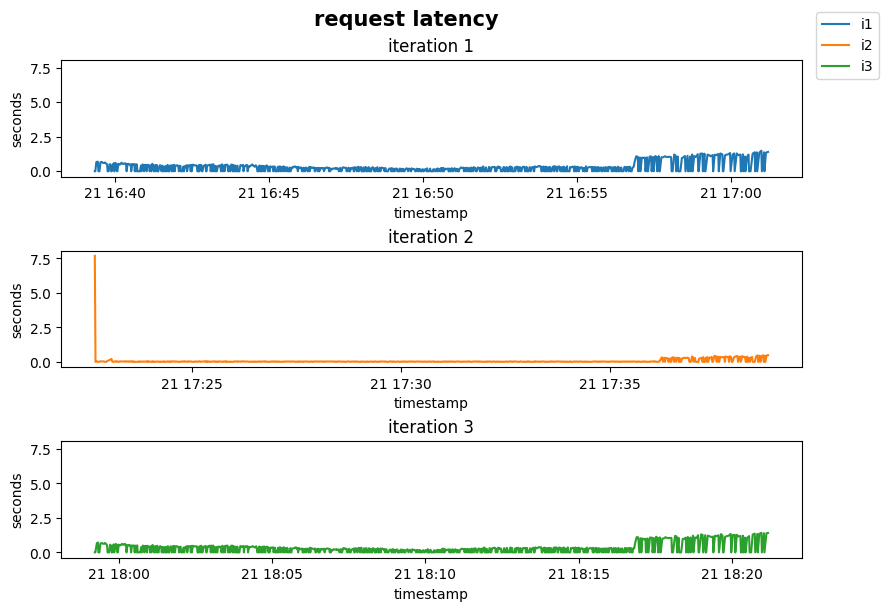

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

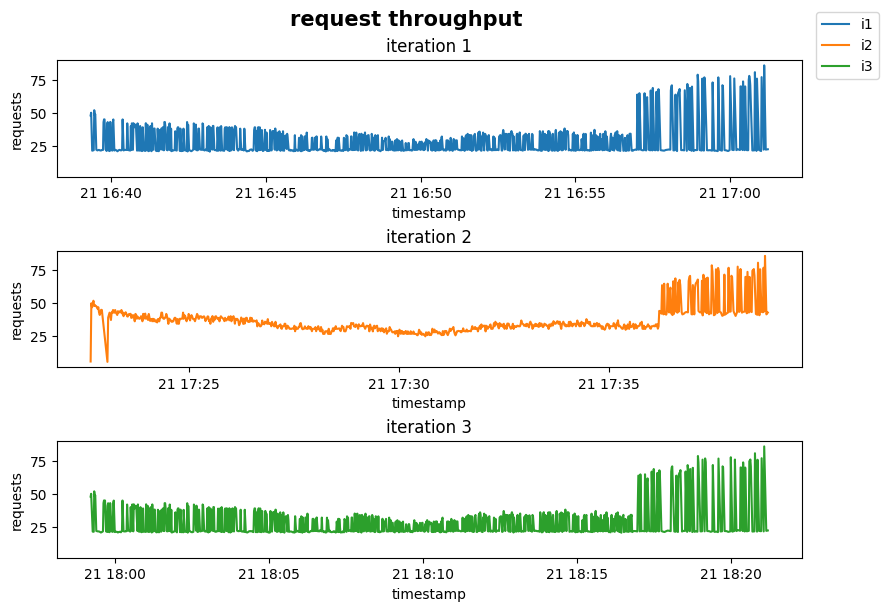

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig